In [1]:
#import dependencies
import pandas as pd 
import scipy as scipy
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
rockford_data = pd.read_csv('Resources/Cleaned_Rockford.csv')
rockford_data.head()

,Unnamed: 0,X,Y,Occurred Date,Description,year
0,0,-89.124354,42.284104,20160125,90C - Disorderly Conduct,2016
1,1,-89.070417,42.254735,20160205,90C - Disorderly Conduct,2016
2,2,-89.042083,42.238147,20160209,13B - Simple Assault,2016
3,3,-89.029085,42.241433,20160210,290 - Destruction/Damage/Vandalism of Property,2016
4,4,-89.029201,42.211097,20160206,23H - All Other Larceny,2016


In [3]:
trimmed_rockford = rockford_data.dropna()
len(trimmed_rockford)

194128

In [4]:
rockford_data.sort_values(by=["year"], inplace = True)
rockford_data

,Unnamed: 0,X,Y,Occurred Date,Description,year
17069,17069,-89.071063,42.225996,20110404,290 - Destruction/Damage/Vandalism of Property,2011
15726,15726,-88.982039,42.272071,20110430,290 - Destruction/Damage/Vandalism of Property,2011
15725,15725,-88.995567,42.298990,20110430,13B - Simple Assault,2011
15724,15724,-89.103151,42.294966,20110430,35B - Drug Equipment Violations,2011
15723,15723,-89.103151,42.294966,20110430,35A - Drug/narcotic Violations,2011
...,...,...,...,...,...,...
190883,190883,-89.106702,42.281239,20200211,13A - Aggravated Assault,2020
190882,190882,-89.106702,42.281239,20200211,90J - Trespass of Real Property,2020
190881,190881,-89.095103,42.271073,20200211,90J - Trespass of Real Property,2020
190887,190887,-89.092193,42.230485,20200213,90C - Disorderly Conduct,2020


In [5]:
cleaned_rockford = rockford_data[['Description', 'year', 'Occurred Date', 'X', 'Y']]
cleaned_rockford.head()

,Description,year,Occurred Date,X,Y
17069,290 - Destruction/Damage/Vandalism of Property,2011,20110404,-89.071063,42.225996
15726,290 - Destruction/Damage/Vandalism of Property,2011,20110430,-88.982039,42.272071
15725,13B - Simple Assault,2011,20110430,-88.995567,42.298990
15724,35B - Drug Equipment Violations,2011,20110430,-89.103151,42.294966
15723,35A - Drug/narcotic Violations,2011,20110430,-89.103151,42.294966


In [6]:
cleaned_rockford.replace("Description", "Crime")

,Description,year,Occurred Date,X,Y
17069,290 - Destruction/Damage/Vandalism of Property,2011,20110404,-89.071063,42.225996
15726,290 - Destruction/Damage/Vandalism of Property,2011,20110430,-88.982039,42.272071
15725,13B - Simple Assault,2011,20110430,-88.995567,42.298990
15724,35B - Drug Equipment Violations,2011,20110430,-89.103151,42.294966
15723,35A - Drug/narcotic Violations,2011,20110430,-89.103151,42.294966
...,...,...,...,...,...
190883,13A - Aggravated Assault,2020,20200211,-89.106702,42.281239
190882,90J - Trespass of Real Property,2020,20200211,-89.106702,42.281239
190881,90J - Trespass of Real Property,2020,20200211,-89.095103,42.271073
190887,90C - Disorderly Conduct,2020,20200213,-89.092193,42.230485


In [7]:

for index, row in cleaned_rockford.iterrows():
    cleaned_rockford['Description'][index] = cleaned_rockford['Description'][index].split('- ')[1]

cleaned_rockford.head()


<ipython-input-7-8c8e6d37239b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_rockford['Description'][index] = cleaned_rockford['Description'][index].split('- ')[1]
C:\Users\wuebb\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,Description,year,Occurred Date,X,Y
17069,Destruction/Damage/Vandalism of Property,2011,20110404,-89.071063,42.225996
15726,Destruction/Damage/Vandalism of Property,2011,20110430,-88.982039,42.272071
15725,Simple Assault,2011,20110430,-88.995567,42.298990
15724,Drug Equipment Violations,2011,20110430,-89.103151,42.294966
15723,Drug/narcotic Violations,2011,20110430,-89.103151,42.294966


In [8]:
cleaned_rockford['Description'].unique()

array(['Destruction/Damage/Vandalism of Property', 'Simple Assault',
       'Drug Equipment Violations', 'Drug/narcotic Violations',
       'Disorderly Conduct', 'Aggravated Assault', 'All Other Larceny',
       'Burglary/Breaking & Entering', 'Theft From Motor Vehicle',
       'Robbery', 'Weapon Law Violations',
       'Credit Card/Automatic Teller Fraud', 'Motor Vehicle Theft',
       'Liquor Law Violations', 'Trespass of Real Property',
       'Curfew/Loitering/Vagrancy Violations',
       'Theft of Motor Vehicle Parts/Accessories', 'Shoplifting',
       'Intimidation', 'Impersonation',
       'False Pretenses/Swindle/Confidence Game',
       'Assisting or Promoting Prostitution',
       'Driving Under the Influence', 'Counterfeiting/Forgery',
       'Stolen Property Offenses', 'Arson',
       'Theft From Coin Operated Machine or Device', 'Purse-Snatching',
       'Pornography/Obscene Material', 'Wire Fraud', 'Pocket-Picking',
       'Prostitution', 'Peeping', 'Extortion/Blackmail',

In [30]:
cleaned_rockford.rename(columns={"Description": "Crime"}, inplace = True)
cleaned_rockford.rename(columns={"year": "Year"}, inplace = True)
filtered_cleaned_rockford = cleaned_rockford['Crime'].replace('Destruction/Damage/Vandalism of Property', 'CRIMINAL DAMAGE').replace('All Other Larceny', 'THEFT').replace('Disorderly Conduct', 'DISORDERLY CONDUCT').replace('Curfew/Loitering/Vagrancy Violations', 'OTHER').replace('Embezzlement', 'OTHER').replace('Extortion/Blackmail', 'OTHER').replace('Weapon Law Violations', 'WEAPONS VIOLATIONS').replace('Motor Vehicle Theft', 'THEFT').replace('Arson', 'ARSON').replace('Peeping', 'SEX OFFENSE').replace('Intimidation', 'ASSAULT').replace('Wire Fraud', 'FRAUD').replace('Liquor Law Violations', 'LIQOUR VIOLATIONS').replace('Driving Under the Influence', 'LIQOUR VIOLATIONS').replace('Impersonation', 'FRAUD').replace('False Pretenses/Swindle/Confidence Game', 'FRAUD').replace('Credit Card/Automatic Teller Fraud', 'FRAUD').replace('Counterfeiting/Forgery', 'FRAUD').replace('Assisting or Promoting Prostitution', 'SEX OFFENSE').replace('Pornography/Obscene Material', 'SEX OFFENSE').replace('Prostitution', 'SEX OFFENSE').replace('Theft From Building', 'THEFT').replace('Purse-Snatching', 'THEFT').replace('Negligent Manslaughter', 'HOMICIDE').replace('Justifiable Homicide', 'HOMICIDE').replace('Drug Equipment Violations', 'NARCOTICS').replace('Drug/narcotic Violations', 'NARCOTICS').replace('Murder and Nonnegligent Manslaughter', 'HOMICIDE').replace('Trespass of Real Property', 'TRESPASS').replace('Theft of Motor Vehicle Parts/Accessories', 'Theft').replace('Simple Assault','ASSAULT').replace('Aggravated Assault','ASSAULT').replace('Pocket-Picking','THEFT').replace('Stolen Property Offenses','THEFT').replace('Shoplifting','THEFT').replace('Theft','THEFT').replace('Burglary/Breaking & Entering','THEFT').replace('Theft From Motor Vehicle', 'THEFT').replace('Theft From Coin Operated Machine or Device', 'THEFT').replace('Robbery', 'THEFT')
rf_crime_types = filtered_cleaned_rockford.value_counts()
cleaned_rockford

C:\Users\wuebb\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Crime,Year,Occurred Date,X,Y
17069,Destruction/Damage/Vandalism of Property,2011,20110404,-89.071063,42.225996
15726,Destruction/Damage/Vandalism of Property,2011,20110430,-88.982039,42.272071
15725,Simple Assault,2011,20110430,-88.995567,42.298990
15724,Drug Equipment Violations,2011,20110430,-89.103151,42.294966
15723,Drug/narcotic Violations,2011,20110430,-89.103151,42.294966
...,...,...,...,...,...
190883,Aggravated Assault,2020,20200211,-89.106702,42.281239
190882,Trespass of Real Property,2020,20200211,-89.106702,42.281239
190881,Trespass of Real Property,2020,20200211,-89.095103,42.271073
190887,Disorderly Conduct,2020,20200213,-89.092193,42.230485


In [10]:
rf_crime_df = pd.DataFrame({
    'Total': rf_crime_types
}).reset_index()
rf_crime_df

,index,Total
0,THEFT,62317
1,ASSAULT,43164
2,CRIMINAL DAMAGE,34360
3,DISORDERLY CONDUCT,15720
4,NARCOTICS,8952
5,TRESPASS,8082
6,FRAUD,7446
7,LIQOUR VIOLATIONS,7253
8,WEAPONS VIOLATIONS,4771
9,OTHER,918


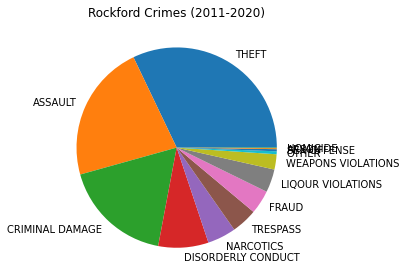

In [11]:
plt.pie(rf_crime_df['Total'], labels=rf_crime_df['index'])
plt.title('Rockford Crimes (2011-2020)')
plt.tight_layout()
plt.show()

In [22]:
year_crime_df = pd.DataFrame({
    'Count':cleaned_rockford['year'].value_counts()
}).reset_index()
year_crime_df.rename(columns={"index": "Year"}, inplace = True)
sort_rf_year_crime = year_crime_df.sort_values(by=['Year']).reset_index()
sort_rf_year_crime

,index,Year,Count
0,0,2011,23566
1,1,2012,23543
2,2,2013,21802
3,4,2014,20390
4,6,2015,19965
5,5,2016,20174
6,8,2017,19538
7,3,2018,21093
8,7,2019,19905
9,9,2020,4153


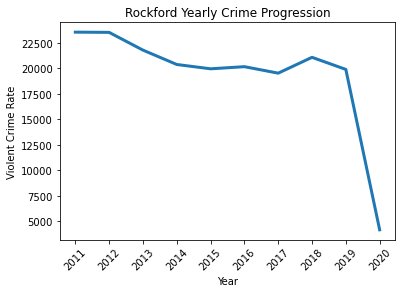

In [23]:
plt.plot(sort_rf_year_crime['Count'], linewidth=3)
plt.title('Rockford Yearly Crime Progression')
# Generate a scatter plot of year versus violent crime rate
year = sort_rf_year_crime['Year']
#violent_crime_rate = crime_data.iloc[:,3]
#plt.scatter(year,violent_crime_rate)
plt.xticks(np.arange(10), year, rotation=45)
plt.xlabel('Year')
plt.ylabel('Violent Crime Rate')
plt.show()

In [31]:
def yearCrime(dataframe, year):
    new_df=dataframe.loc[dataframe["Year"]==year]
    return new_df
rfcrime11 = yearCrime(cleaned_rockford, 2011)
rfcrime12 = yearCrime(cleaned_rockford, 2012)
rfcrime13 = yearCrime(cleaned_rockford, 2013)
rfcrime14 = yearCrime(cleaned_rockford, 2014)
rfcrime15 = yearCrime(cleaned_rockford, 2015)
rfcrime16 = yearCrime(cleaned_rockford, 2016)
rfcrime17 = yearCrime(cleaned_rockford, 2017)
rfcrime18 = yearCrime(cleaned_rockford, 2018)
rfcrime19 = yearCrime(cleaned_rockford, 2019)
rfcrime20 = yearCrime(cleaned_rockford, 2020)

rfcrime_count_11 = len(rfcrime11)
rfcrime_count_12 = len(rfcrime12)
rfcrime_count_13 = len(rfcrime13)
rfcrime_count_14 = len(rfcrime14)
rfcrime_count_15 = len(rfcrime15)
rfcrime_count_16 = len(rfcrime16)
rfcrime_count_17 = len(rfcrime17)
rfcrime_count_18 = len(rfcrime18)
rfcrime_count_19 = len(rfcrime19)
rfcrime_count_20 = len(rfcrime20)



In [32]:
rf_year_breakdown = pd.DataFrame({
    '2011': [rfcrime_count_11],
    '2012': rfcrime_count_12,
    '2013': rfcrime_count_13,
    '2014': rfcrime_count_14,
    '2015': rfcrime_count_15,
    '2016': rfcrime_count_16,
    '2017': rfcrime_count_17,
    '2018': rfcrime_count_18,
    '2019': rfcrime_count_19,
    '2020': rfcrime_count_20,
})
rf_year_breakdown = rf_year_breakdown.transpose()

rf_year_breakdown

,0
2011,23566
2012,23543
2013,21802
2014,20390
2015,19965
2016,20174
2017,19538
2018,21093
2019,19905
2020,4153


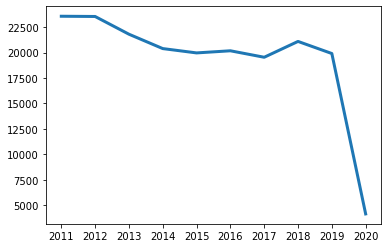

In [33]:
plt.plot(rf_year_breakdown, linewidth=3)

In [34]:
new_data = pd.read_csv('Resources/Chicago_crimes.csv')
trimmed = new_data.dropna()
trimmed.sort_values(by=["Year"], inplace = True)
chic_cleaned_crime = trimmed[["Year", "Longitude", "Latitude", "Location", "Primary Type"]]
chic_cleaned_crime.rename(columns={"Primary Type": "Crime"}, inplace = True)
chic_cleaned_crime = chic_cleaned_crime.replace({'CRIM SEXUAL ASSAULT':'CRIMINAL SEXUAL ASSAULT',
                                       'CONCEALED CARRY LICENSE VIOLATION':'WEAPONS VIOLATION',
                                       'OTHER NARCOTIC VIOLATION':'NARCOTICS',
                                       'NON - CRIMINAL':'NON-CRIMINAL',
                                       'NON-CRIMINAL (SUBJECT SPECIFIED)':'NON-CRIMINAL'})
chic_cleaned_crime

<ipython-input-34-b21822adccee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed.sort_values(by=["Year"], inplace = True)
C:\Users\wuebb\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Year,Longitude,Latitude,Location,Crime
282677,2001,-87.626402,41.815670,"(41.815669549, -87.626402198)",ROBBERY
519941,2001,-87.722564,41.889896,"(41.889896295, -87.722564425)",HOMICIDE
733830,2001,-87.696886,41.903162,"(41.903162458, -87.696885733)",HOMICIDE
241086,2001,-87.646468,41.839771,"(41.839770706, -87.646467578)",OFFENSE INVOLVING CHILDREN
328456,2001,-87.656375,41.856268,"(41.85626764, -87.656374568)",HOMICIDE
...,...,...,...,...,...
255223,2020,-87.728277,41.939081,"(41.939081232, -87.728277456)",ASSAULT
255225,2020,-87.767064,41.882210,"(41.882209936, -87.767064116)",MOTOR VEHICLE THEFT
255226,2020,-87.687894,41.811111,"(41.811111038, -87.687893773)",BATTERY
255214,2020,-87.783369,41.910031,"(41.91003074, -87.783368829)",ROBBERY


In [35]:
chicrime11 = yearCrime(chic_cleaned_crime, 2011)
chicrime12 = yearCrime(chic_cleaned_crime, 2012)
chicrime13 = yearCrime(chic_cleaned_crime, 2013)
chicrime14 = yearCrime(chic_cleaned_crime, 2014)
chicrime15 = yearCrime(chic_cleaned_crime, 2015)
chicrime16 = yearCrime(chic_cleaned_crime, 2016)
chicrime17 = yearCrime(chic_cleaned_crime, 2017)
chicrime18 = yearCrime(chic_cleaned_crime, 2018)
chicrime19 = yearCrime(chic_cleaned_crime, 2019)
chicrime20 = yearCrime(chic_cleaned_crime, 2020)

chicrime_count_11 = len(chicrime11)
chicrime_count_12 = len(chicrime12)
chicrime_count_13 = len(chicrime13)
chicrime_count_14 = len(chicrime14)
chicrime_count_15 = len(chicrime15)
chicrime_count_16 = len(chicrime16)
chicrime_count_17 = len(chicrime17)
chicrime_count_18 = len(chicrime18)
chicrime_count_19 = len(chicrime19)
chicrime_count_20 = len(chicrime20)



In [36]:
chi_year_breakdown = pd.DataFrame({
    '2011': [chicrime_count_11],
    '2012': chicrime_count_12,
    '2013': chicrime_count_13,
    '2014': chicrime_count_14,
    '2015': chicrime_count_15,
    '2016': chicrime_count_16,
    '2017': chicrime_count_17,
    '2018': chicrime_count_18,
    '2019': chicrime_count_19,
    '2020': chicrime_count_20,
})
chi_year_breakdown = chi_year_breakdown.transpose()

chi_year_breakdown

,0
2011,807
2012,872
2013,989
2014,1671
2015,210638
2016,265677
2017,262674
2018,4180
2019,167671
2020,54682


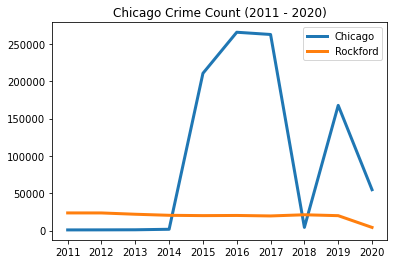

In [44]:
plt.plot(chi_year_breakdown, linewidth=3, label="Chicago")
plt.plot(rf_year_breakdown, linewidth=3, label="Rockford")
plt.title('Chicago Crime Count (2011 - 2020)')
plt.legend()

plt.savefig("Resources/chi-crime-annual.png")

In [39]:
plt.savefig("Resources/chi-crime-annual.png")

<Figure size 432x288 with 0 Axes>